# Prosper Loan Data Exploration
## by Satoshi

## Investigation Overview

> The goal of this presentation is to show the features to affect the borrowers APR and the original amount of loans. And also try to answer the question of how are homeowners and/or high income earners benefits to get loans ?


## Dataset Overview

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. 


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
loan=pd.read_csv('loan.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Pairwise correlation

- Borrower APR and Grade are negatively correlated. The better grade borrowers can have a chance to get a low interest rate. And also Borrower APR is negatively correlated with loan original amount. Interest rates of small loans are higher than ones in big loans.
​
- Loan Original lAmount is positively correlated with Grade.The better gade can get bigger amount of loans
​
- Borrowers APR and Estimated Loss are positively correlated and also positively correlated with Estimated Return as well. This can be understandable that Estimated Return are positive correlations with Borrower APR because high interest rates can give a more profit to lenders than low interest loans but,  at the same time,  that high interest rate is given to low grade borrowers that should increase the chances of defaults.
​
- Grade is closely linked to income range but, a bit surprisingly, weak link to Employment Status and no link to Employment Duration. Income range is a very important factor for Grades.

<Figure size 841.68x595.44 with 0 Axes>

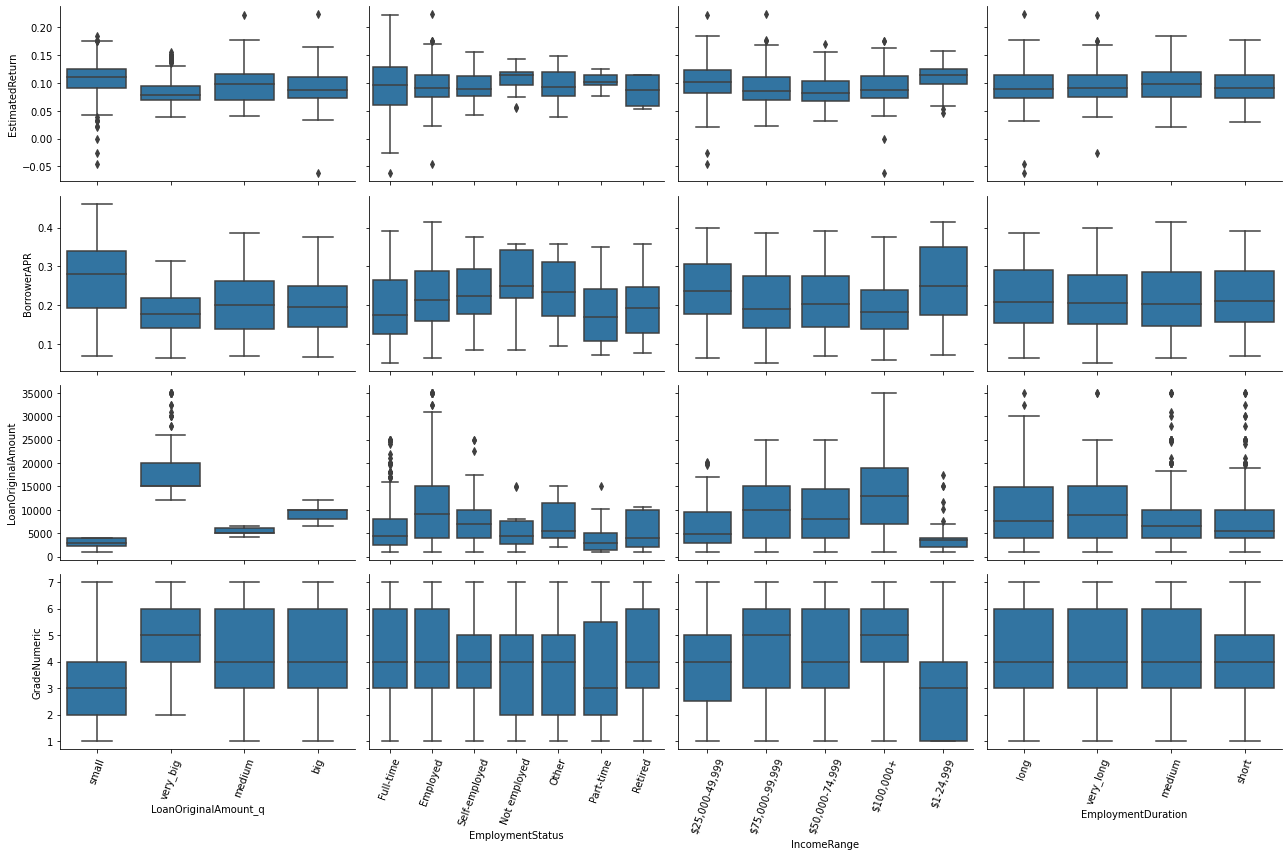

In [9]:
categoric_vars=['LoanOriginalAmount_q','EmploymentStatus','IncomeRange','EmploymentDuration']

samples=np.random.choice(loan.shape[0], 2000, replace=False)
loan_samp=loan.iloc[samples,:]

def boxgrid(x,y,**kwargs):
    default_color=sb.color_palette()[0]
    sb.boxplot(x,y,color=default_color)
    
plt.figure(figsize=[11.69,8.27]);
g=sb.PairGrid(data=loan_samp, y_vars=['EstimatedReturn','BorrowerAPR','LoanOriginalAmount', 'GradeNumeric'],
             x_vars=categoric_vars, height=3, aspect=1.5);

g.map(boxgrid);

# x labels rotate
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(),rotation=70);
plt.tight_layout();
plt.show();


## Correlation among loan amount, emploment status and grade


 - Employment Status has a significant impact on Loan Original Amount. ‘Employed’ status  occupied the majority part of loans. ‘Employed’ together with ‘Full time’ covers almost all of the loans. 
 - Loan Original Amount and Grade are positive correlation.  The grade is better, the categories of loan amount are bigger. For grade AA, A, B and C, the most frequent categories are very big loans, while HR, E, D, small loans are the most frequent. Particularly in HR almost all of the loans are small category. 

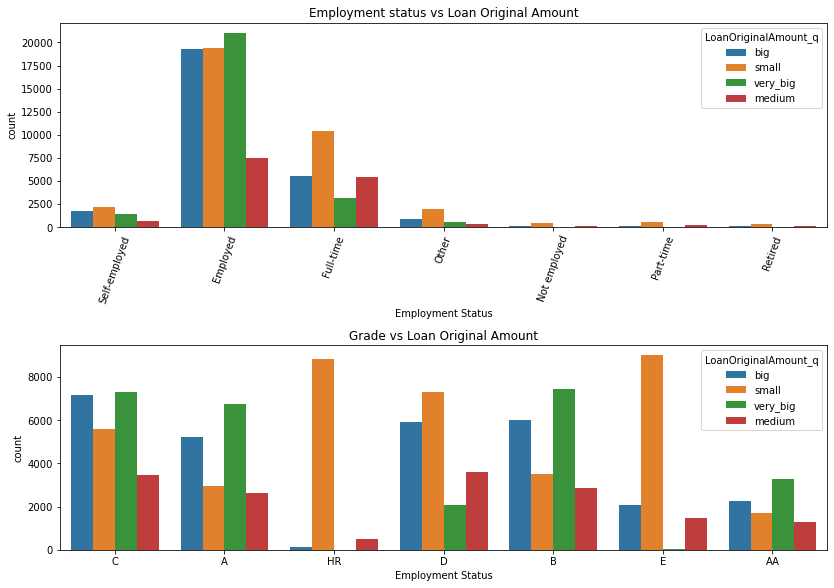

In [12]:
plt.figure(figsize=[11.69,8.27])

plt.subplot(2,1,1)
ax=sb.countplot(data=loan, x='EmploymentStatus', hue='LoanOriginalAmount_q');
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);
plt.xlabel('Employment Status')
plt.title('Employment status vs Loan Original Amount')
plt.tight_layout();

plt.subplot(2,1,2)
sb.countplot(data=loan, x='Grade', hue='LoanOriginalAmount_q');
plt.xlabel('Employment Status')
plt.title('Grade vs Loan Original Amount');
plt.tight_layout();

## Original Loan Amount with/without Home

With or without home is significantly important for the loan amount. The plot shows that the total amounts of loans for big loans with home are about double compared to no home ownership in very big loans, while in small loans, amounts of loans of no homeowners are bigger than those for homeowners. 

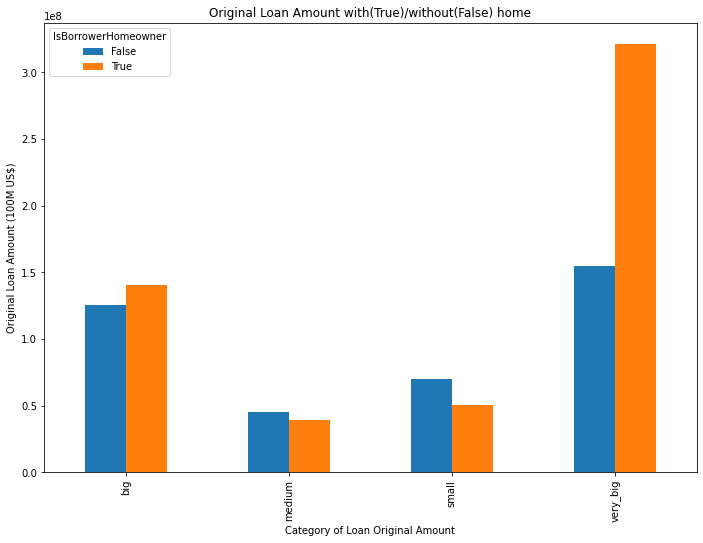

In [5]:
# differences of loan amount with/without home
pivot_loanamount=loan.pivot_table('LoanOriginalAmount', index='LoanOriginalAmount_q',
                                  columns='IsBorrowerHomeowner', aggfunc='sum')
pivot_loanamount.plot(kind='bar',figsize=[11.69,8.27] );
plt.xlabel('Category of Loan Original Amount')
plt.ylabel('Original Loan Amount (100M US$)');
plt.title('Original Loan Amount with(True)/without(False) home');

## Grade with/without Home

Grades are very closely correlated with home ownership.


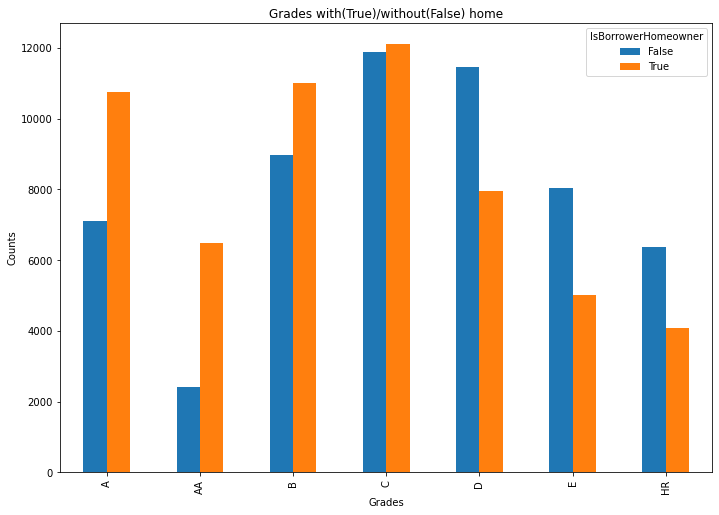

In [6]:
pivot_grade=loan.pivot_table('GradeNumeric', index='Grade',
                           columns=['IsBorrowerHomeowner'],aggfunc='count')
pivot_grade.plot(kind='bar', figsize=[11.69,8.27]);
plt.xlabel('Grades')
plt.ylabel('Counts');
plt.title('Grades with(True)/without(False) home');

## Conclusion

- Income range and Homeownership are key factors of Grades.
- Grades together with Employment status impact on Borrower APR on Loan Amounts.


> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!